In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


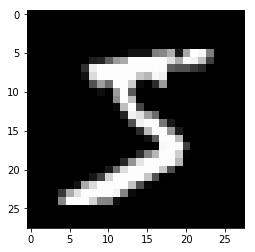

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


In [7]:
predictions = model(x_train[:1]).numpy()
predictions

array([[  14.733381 ,  -47.893238 ,  126.436935 ,  -95.636185 ,
         123.913734 ,  -66.43578  ,    3.3798218, -253.5177   ,
        -227.84576  ,  164.47083  ]], dtype=float32)

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.0000000e+00, 0.0000000e+00, 3.0345313e-17, 0.0000000e+00,
        2.4337688e-18, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
loss_fn(y_train[:1], predictions).numpy()

230.90662

In [11]:
y_train[:1]

array([5], dtype=uint8)

In [12]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 2.5288 - accuracy: 0.7676
Epoch 2/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5755 - accuracy: 0.8463
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4707 - accuracy: 0.8744
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4291 - accuracy: 0.8876
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3968 - accuracy: 0.8974


In [14]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 0.3014 - accuracy: 0.9334


[0.30143117604330183, 0.9334]